Imports


In [1]:
import numpy as np
from scipy.io import arff
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Loading the Data and PreProcessing


Load the data


In [2]:


# Load ARFF file
file_path = 'EEG Eye State.arff'
data, meta = arff.loadarff(file_path)


data = pd.DataFrame(data)

set(list(data['eyeDetection']))

{b'0', b'1'}

Replace the string values for the labels with binary 0 and 1 values


In [3]:
data.replace({b'0': '0', b'1': '1'}, inplace=True)
data.replace({'0': 0, '1': 1}, inplace=True)
data

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,eyeDetection
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


separate the labels from the data


In [4]:
labels = data.iloc[:, -1]
labels

0        0
1        0
2        0
3        0
4        0
        ..
14975    1
14976    1
14977    1
14978    1
14979    1
Name: eyeDetection, Length: 14980, dtype: int64

Scale the data using min-max technique


In [18]:

# input_data
dataset = data.iloc[:, :-1]
dataset = ((dataset - dataset.min())/(dataset.max() - dataset.min())
           ) * 9 + 1  # because we want the data to be between 1 and 10
dataset.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,1.096107,3.133353,5.968094,1.024065,5.622524,1.046922,1.032239,1.163109,1.097425,5.473936,3.355699,4.834150,1.267747,1.038420
std,0.072773,0.083130,0.068462,0.073343,0.071306,0.073161,0.073277,0.097754,0.072754,0.070494,0.095802,0.078805,0.071444,0.074205
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.094898,3.098978,5.946886,1.023268,5.602098,1.046116,1.031404,1.124943,1.096470,5.453916,3.324775,4.812254,1.266303,1.037483
50%,1.095303,3.125884,5.965840,1.023441,5.616836,1.046270,1.031600,1.154009,1.096767,5.470071,3.350763,4.829763,1.267030,1.037645
75%,1.095812,3.157441,5.978492,1.023607,5.633688,1.046488,1.031812,1.189950,1.097099,5.489079,3.378069,4.849225,1.267879,1.037871
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


split the dataset for training and testing


In [6]:

X_train, X_test, y_train, y_test = train_test_split(
    dataset, labels, test_size=0.1, random_state=42)

## K-means implementation


In [7]:


class K_Means:
    def __init__(self, k, random_state=42, max_iter=100):
        """
        k: number of clusters
        random_state: random seed for the random generator
        max_iter: maximum number of iterations
        """
        self.k = k
        self.clusters = []
        self.centers = []
        self.pred = []
        self.inertia = 0
        self.max_iter = max_iter
        self.random_state = random_state
        self.rng = np.random.default_rng(seed=random_state)

    def fit(self, X):
        """
        X: dataset to be classified
        """
        k = self.k
        X = np.array(X)
        self.clusters = []
        self.generate_centers(k, X)

        for i in range(self.max_iter):
            old_centers = np.array([cluster['center']
                                   for cluster in self.clusters])
            self.group_clusters(X)
            self.update_means(X)
            new_centers = np.array([cluster['center']
                                   for cluster in self.clusters])
            self.centers = new_centers

            if np.all(old_centers == new_centers):
                self.iter = i
                break

        self.pred = self.predict_clusters(X)
        self.calculate_inertia()

    def generate_centers(self, k, X):
        """
        k: number of centers
        X: input data matrix
        """
        sampled_indices = self.rng.choice(len(X), k, replace=False)
        centers = X[sampled_indices]
        self.clusters = [{'center': center, 'points': []}
                         for center in centers]

    def group_clusters(self, X):
        """
        Identify the closest cluster/group for each point in the dataset.
        """
        centers = np.array([cluster['center'] for cluster in self.clusters])
        distances = np.linalg.norm(X[:, np.newaxis, :] - centers, axis=2)
        closest_clusters = np.argmin(distances, axis=1)

        for i, cluster_idx in enumerate(closest_clusters):
            self.clusters[cluster_idx]['points'].append(X[i])

    def update_means(self, X):
        """
        Update the centers of each cluster after regrouping. Resets the points 
        assigned to that cluster afterwards for iteration.
        """
        for cluster in self.clusters:
            if len(cluster['points']) > 0:
                cluster['center'] = np.mean(cluster['points'], axis=0)
                # Keep track of original points
                cluster['original_points'] = cluster['points'].copy()
                cluster['points'] = []

    def predict_clusters(self, X):
        """
        same thing to group_clusters, but also returns an array of the indices of 
        where each point is grouped.
        """
        centers = np.array([cluster['center'] for cluster in self.clusters])
        distances = np.linalg.norm(X[:, np.newaxis, :] - centers, axis=2)
        return np.argmin(distances, axis=1)

    def calculate_inertia(self):
        self.inertia = sum(
            np.sum(np.linalg.norm(np.array(
                cluster['original_points']) - np.array(cluster['center']), axis=1) ** 2)
            if 'original_points' in cluster else 0  # Skip clusters without original points
            for cluster in self.clusters
        )

## Comparision with built-in impelemntation


Test and compare our K-means implementation and compare it with results from the built-in k-means from sklearn on randomly generated data.


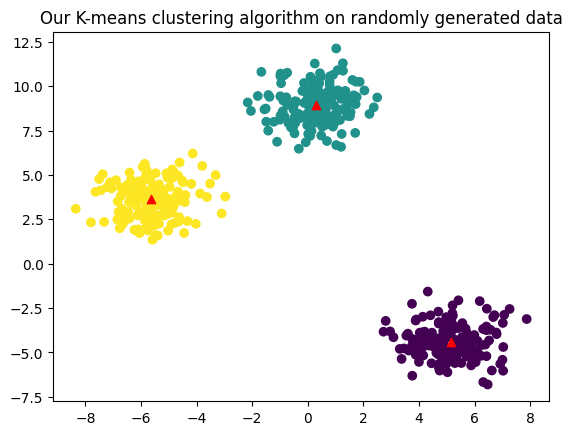

In [8]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, n_features=2, centers=3, random_state=23)
np.random.seed(23)

kmeans = K_Means(3)
kmeans.fit(X)
pred = kmeans.predict_clusters(X)

plt.scatter(X[:, 0], X[:, 1], c=pred)
for cluster in kmeans.clusters:
    center = cluster['center']
    plt.scatter(center[0], center[1], marker="^", c='red')
plt.title("Our K-means clustering algorithm on randomly generated data")
plt.show()

compare it with the implementation from sklearn on similar data.


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 0.293089    8.93255251]
 [ 5.1482619  -4.38609379]
 [-5.64869015  3.64917816]]


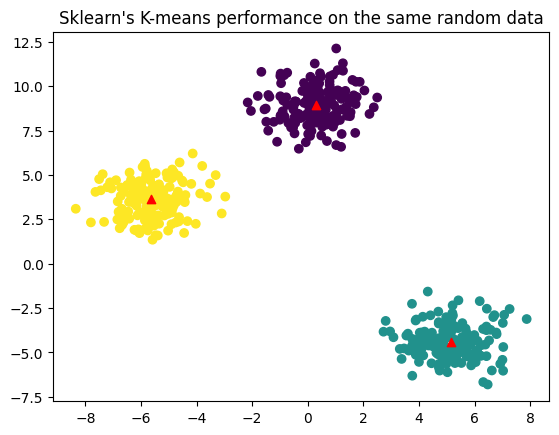

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=23)
sk_kmeans = kmeans.fit(X)
centers = sk_kmeans.cluster_centers_
pred = sk_kmeans.predict(X)
print(centers)

plt.scatter(X[:, 0], X[:, 1], c=pred)
for center in centers:
    plt.scatter(center[0], center[1], marker="^", c='red')
plt.title("Sklearn's K-means performance on the same random data")
plt.show()

## Elbow Method for best K


Find the optimal number of clusters using the elbow for the dataset


In [10]:
def optimize_elbow_plot(dataset, start, end, step=1):
    k_values = range(start, end, step)
    inertia_values = []

    for k in k_values:
        kmeans = K_Means(k)
        kmeans.fit(dataset)
        inertia_values.append(kmeans.inertia)
        print(f'{k} Inertia: {kmeans.inertia} iterations: {kmeans.iter}')

    # Plot the Elbow Curve
    plt.plot(k_values, inertia_values, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia')
    plt.show()

1 Inertia: 1256.6869831167435 iterations: 1
101 Inertia: 543.8104917719681 iterations: 67
201 Inertia: 537.3759422854292 iterations: 69
301 Inertia: 265.7908984477306 iterations: 63
401 Inertia: 264.1139398201878 iterations: 43
501 Inertia: 262.7922790489301 iterations: 38
601 Inertia: 261.859997676161 iterations: 29
701 Inertia: 261.1904554787836 iterations: 32
801 Inertia: 260.50110346099603 iterations: 28
901 Inertia: 259.931813228983 iterations: 23
1001 Inertia: 259.5242851302668 iterations: 23


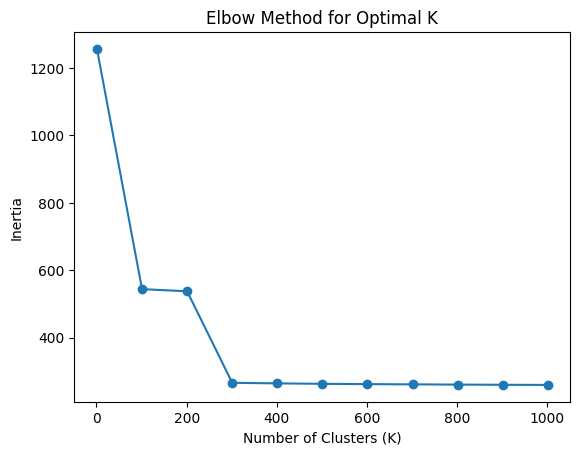

In [76]:
optimize_elbow_plot(dataset, 1, 1002, 100)

So we choose K to be 300. So, when we choose the number of the number of clusters on the RBF network later


## RBF network implementation


In [19]:
class RBFNetwork:
    def __init__(self, num_centers, learning_rate=0.001, random_state=42):
        self.num_centers = num_centers
        # self.random_state = random_state
        self.kmeans = K_Means(num_centers, random_state=random_state)
        self.rbf_centers = None
        self.rbf_width = None
        self.learning_rate = learning_rate
        self.weights = None

    def fit(self, X, y):

        # Fit K-means to get RBF centers
        self.kmeans.fit(X)
        X = np.array(X)
        print(np.array(self.kmeans.centers))
        self.rbf_centers = np.array(self.kmeans.centers)

        # standard deviation for width (spread)
        distances = np.sqrt(
            ((X[:, np.newaxis, :] - self.rbf_centers) ** 2).sum(axis=2))
        self.rbf_width = np.std(distances)

        # Apply RBF activation to get features and then add bias 1
        rbf_features = np.exp(-(distances ** 2) / (2 * (self.rbf_width ** 2)))
        rbf_features = np.c_[rbf_features, np.ones(X.shape[0])]

        # solve the linear system
        self.weights = np.linalg.pinv(rbf_features) @ y

    def predict(self, X):
        X = np.array(X)
        distances = np.sqrt(
            ((X[:, np.newaxis, :] - self.rbf_centers) ** 2).sum(axis=2))
        rbf_features = np.exp(-(distances ** 2) / (2 * (self.rbf_width ** 2)))

        # Add a bias term to the features
        rbf_features = np.c_[rbf_features, np.ones(X.shape[0])]

        # Make predictions using the learned weights
        predictions = rbf_features @ self.weights

        return predictions

    def guassian_kernel(self, X, centroid):
        vector = X - centroid
        return np.exp(-(np.linalg.norm(vector)**2)/(2*(np.std(vector)**2)))

Evaluate the RBFNetwork on the test data, using the initial K-means implementation. We have chosen K to be 300 by using the elbow method.


## Evaluation on testing set


Evaluate the RBFNetwork on the test data, using K-means plus implementation. We have chosen K to be 300 by using the elbow method.


Evaluate our model based on its accuracy on testing set


In [12]:
import time


def evaluate_rbf_network(k):
    start_time = time.time()
    rbf_net = RBFNetwork(k)
    rbf_net.fit(X_train, y_train)
    pred = rbf_net.predict(X_test)

    count = 0
    for i in range(len(pred)):
        if pred[i] >= 0.5:
            value = 1
        else:
            value = 0
        if (value == y_test.values[i]):
            count += 1
    accuracy = count/len(pred)
    end_time = time.time()

    return (accuracy, end_time-start_time)

for k = 300


In [20]:
accuracy, time_taken = evaluate_rbf_network(300)

print(
    f'\n\n for {300} centers, accuracy = {accuracy}, time taken = {time_taken}')

[[1.0958783  3.16802126 5.97570429 ... 4.84473968 1.26771216 1.0378103 ]
 [1.09527246 3.13552356 5.94352893 ... 4.82286559 1.26668294 1.03766581]
 [1.09512698 3.12230622 5.96677118 ... 4.82575377 1.26671928 1.03755182]
 ...
 [1.09530479 3.1140884  5.95591285 ... 4.84658441 1.2688884  1.03778893]
 [1.09552937 3.20014526 5.97386016 ... 4.82801115 1.26718597 1.03760013]
 [1.09364285 3.09972362 5.92587523 ... 4.77965659 1.26367539 1.03677713]]


 for 300 centers, accuracy = 0.8551401869158879, time taken = 26.963091373443604


for k = 3000


In [17]:
accuracy, time_taken = evaluate_rbf_network(3000)

print(
    f'\n\n for {3000} centers, accuracy = {accuracy}, time taken = {time_taken}')

[[1.09529266 3.10516602 5.99139459 ... 4.87321403 1.26701008 1.03773325]
 [1.09438913 3.11886107 5.92170498 ... 4.79113653 1.26411943 1.03702026]
 [1.09323182 3.18566905 5.93627147 ... 4.73847075 1.26052001 1.03638173]
 ...
 [1.09555125 3.11679001 5.97785673 ... 4.86945692 1.26763061 1.03792919]
 [1.0956023  3.17877499 5.96426853 ... 4.830749   1.26666617 1.03780001]
 [1.09295902 3.0579164  5.90657879 ... 4.77286068 1.26338402 1.03665021]]


 for 3000 centers, accuracy = 0.9198931909212283, time taken = 128.1837203502655


### Evaluate the performance for different values of k and plot the results


[[1.09617252 3.13325773 5.96807831 1.02413126 5.62263312 1.04698921
  1.03230677 1.16340978 1.09749403 5.47411459 3.35598067 4.83423585
  1.26781116 1.03849713]]
[[1.09572726 3.1235497  5.98567517 ... 4.85686119 1.26741113 1.03785744]
 [1.09567843 3.18053905 5.97855695 ... 4.83843316 1.26680586 1.03774294]
 [1.09354456 3.15653462 5.89866541 ... 4.7465282  1.26370143 1.03675654]
 ...
 [1.09553797 3.15086228 5.9720425  ... 4.83493418 1.26730621 1.03771345]
 [1.0961834  3.21431106 5.9893483  ... 4.85031123 1.26773282 1.03790154]
 [1.0943259  3.16773372 5.92781513 ... 4.776296   1.26470594 1.03708238]]
[[1.09576342 3.150845   5.95830975 ... 4.84011963 1.26732523 1.03785134]
 [1.09713004 3.18486233 5.99159406 ... 4.86327433 1.2681992  1.03833271]
 [1.0943918  3.09822566 5.92791589 ... 4.79031345 1.26567023 1.03724402]
 ...
 [1.09518846 3.11941856 5.94916369 ... 4.8173286  1.26702618 1.03759754]
 [1.09502787 3.12925946 5.96340168 ... 4.80693129 1.2663458  1.03752235]
 [1.09740182 3.11624882 

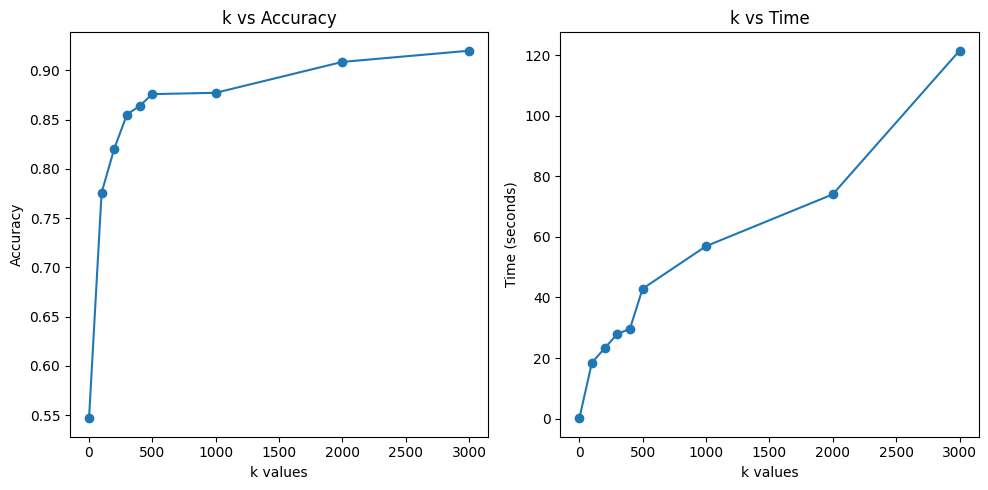

In [13]:
k_values = [1, 100, 200, 300, 400, 500, 1000, 2000, 3000]
evaluations = [evaluate_rbf_network(k) for k in k_values]

accuracies = [evaluation[0] for evaluation in evaluations]
times = [evaluation[1] for evaluation in evaluations]

# k vs accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracies, marker='o')
plt.title('k vs Accuracy')
plt.xlabel('k values')
plt.ylabel('Accuracy')

# k vs time
plt.subplot(1, 2, 2)
plt.plot(k_values, times, marker='o')
plt.title('k vs Time')
plt.xlabel('k values')
plt.ylabel('Time (seconds)')


plt.tight_layout()
plt.show()